In [1]:
#Import libraries
import numpy as np
import pandas as pd
import math
import random
import seaborn as sns
from scipy.stats import pearsonr, jarque_bera
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
'''TODO: Menampilkan lima baris teratas'''
# Memuat dataset Heart Disease UCI ML
url = "https://storage.googleapis.com/dqlab-dataset/heart_disease.csv"
column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
data = pd.read_csv(url, names=column_names, skiprows=[0])

# Menampilkan lima baris teratas
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
'''TODO: Menampilkan lima baris terbawah'''
# Menampilkan lima baris terbawah
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [4]:
'''TODO: Menampilkan jumlah baris dan kolom'''
# Melihat jumlah dataset (jumlah baris dan kolom)
data.shape

(1025, 14)

In [5]:
'''TODO: Menampilkan nama kolom'''
# Melihat columns apa saja yang ada dalam dataset
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
'''TODO: Menampilkan persebaran data untuk data numerik'''
# Melihat persebaran data
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
'''TODO: Menampilkan jumlah data yang unik untuk semua kolom'''
# Melihat uniqueness data
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [8]:
'''TODO: Menampilkan informasi dalam dataframe'''
# Melihat informasi dari dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


**Data Quality**

Disini kita akan melakukan pengecekan karakter, handling missing value, outlier, duplikat dan data imbalance serta skewness.

In [9]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [10]:
'''TODO: Memilih mana data yang kategorikal dan ubah menjadi object'''
# Melakukan handling kolom menjadi kategorikal
lst=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
data[lst] = data[lst].astype(object)

# Melihat perubahan
data.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object

In [11]:
# Pelabelan data categorical
data['sex'] = data['sex'].replace({1: 'Male',
                                   0: 'Female'})
data['cp'] = data['cp'].replace({0: 'typical angina',
                                 1: 'atypical angina',
                                 2: 'non-anginal pain',
                                 3: 'asymtomatic'})
data['fbs'] = data['fbs'].replace({0: 'No',
                                   1: 'Yes'})
data['restecg'] = data['restecg'].replace({0: 'probable or definite left ventricular hypertrophy',
                                           1:'normal',
                                           2: 'ST-T Wave abnormal'})
data['exang'] = data['exang'].replace({0: 'No',
                                       1: 'Yes'})
data['slope'] = data['slope'].replace({0: 'downsloping',
                                       1: 'flat',
                                       2: 'upsloping'})
data['thal'] = data['thal'].replace({1: 'normal',
                                     2: 'fixed defect',
                                     3: 'reversable defect'})
data['ca'] = data['ca'].replace({0: 'Number of major vessels: 0',
                                 1: 'Number of major vessels: 1',
                                 2: 'Number of major vessels: 2',
                                 3: 'Number of major vessels: 3'})
data['target'] = data['target'].replace({0: 'No disease',
                                         1: 'Disease'})

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   object 
 2   cp        1025 non-null   object 
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   object 
 6   restecg   1025 non-null   object 
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   object 
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   object 
 11  ca        1025 non-null   object 
 12  thal      1025 non-null   object 
 13  target    1025 non-null   object 
dtypes: float64(1), int64(4), object(9)
memory usage: 112.2+ KB


In [13]:
'''TODO: Memisahkan data numerical dengan categorical'''
# Pisahkan numerical dan categorical 
numerical_col = data.select_dtypes(exclude=np.object_)
categorical_col = data.select_dtypes(exclude=np.number)

In [14]:
# Pengecekan karakter dari data kategorikal
for i in categorical_col:
    print("Berikut ini merupakan informasi: {} dengan {}".format(i, data[i].unique()))
    print()

Berikut ini merupakan informasi: sex dengan ['Male' 'Female']

Berikut ini merupakan informasi: cp dengan ['typical angina' 'atypical angina' 'non-anginal pain' 'asymtomatic']

Berikut ini merupakan informasi: fbs dengan ['No' 'Yes']

Berikut ini merupakan informasi: restecg dengan ['normal' 'probable or definite left ventricular hypertrophy'
 'ST-T Wave abnormal']

Berikut ini merupakan informasi: exang dengan ['No' 'Yes']

Berikut ini merupakan informasi: slope dengan ['upsloping' 'downsloping' 'flat']

Berikut ini merupakan informasi: ca dengan ['Number of major vessels: 2' 'Number of major vessels: 0'
 'Number of major vessels: 1' 'Number of major vessels: 3' 4]

Berikut ini merupakan informasi: thal dengan ['reversable defect' 'fixed defect' 'normal' 0]

Berikut ini merupakan informasi: target dengan ['No disease' 'Disease']



Terdapat dua feature yang mengalami kesalahan penulisan:
1. Feature 'CA': Memiliki 5 nilai dari rentang 0-4, maka dari itu nilai 4 diubah menjadi NaN (karena seharusnya tidak ada)
2. Feature 'thal': Memiliki 4 nilai dari rentang 0-3, maka dari itu nulai 0 diubah menjadi NaN (karena seharusnya tidak ada)

In [15]:
'''TODO: Menampilkan jumlah data per item'''
# Melihat jumlah nilai unik dari kolom 'ca'
data['ca'].value_counts()

ca
Number of major vessels: 0    578
Number of major vessels: 1    226
Number of major vessels: 2    134
Number of major vessels: 3     69
4                              18
Name: count, dtype: int64

Bahwa ada data di kolom 'ca' yang bernilai '4' sebanyak 18. Padahal nilai '4' harusnya tidak ada.

In [16]:
# Menemukan baris dengan kolom 'ca' bernilai '4'
data[data['ca']==4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
52,38,Male,non-anginal pain,138,175,No,normal,173,No,0.0,upsloping,4,fixed defect,Disease
83,38,Male,non-anginal pain,138,175,No,normal,173,No,0.0,upsloping,4,fixed defect,Disease
128,52,Male,non-anginal pain,138,223,No,normal,169,No,0.0,upsloping,4,fixed defect,Disease
208,38,Male,non-anginal pain,138,175,No,normal,173,No,0.0,upsloping,4,fixed defect,Disease
242,38,Male,non-anginal pain,138,175,No,normal,173,No,0.0,upsloping,4,fixed defect,Disease
290,52,Male,non-anginal pain,138,223,No,normal,169,No,0.0,upsloping,4,fixed defect,Disease
340,38,Male,non-anginal pain,138,175,No,normal,173,No,0.0,upsloping,4,fixed defect,Disease
348,43,Male,typical angina,132,247,Yes,probable or definite left ventricular hypertrophy,143,Yes,0.1,flat,4,reversable defect,No disease
417,52,Male,non-anginal pain,138,223,No,normal,169,No,0.0,upsloping,4,fixed defect,Disease
428,43,Male,typical angina,132,247,Yes,probable or definite left ventricular hypertrophy,143,Yes,0.1,flat,4,reversable defect,No disease


In [17]:
'''TODO: Ubah menjadi NaN'''
# Ganti kolom 'ca' yang bernilai '4' menjadi NaN
data.loc[data['ca']==4,'ca']=np.nan

In [18]:
# Cek kembali apakah masih ada data kolom 'ca' yang bernilai '4'
data['ca'].value_counts()

ca
Number of major vessels: 0    578
Number of major vessels: 1    226
Number of major vessels: 2    134
Number of major vessels: 3     69
Name: count, dtype: int64

In [19]:
# Melihat jumlah nilai unik dari kolom 'thal'
data['thal'].value_counts()

thal
fixed defect         544
reversable defect    410
normal                64
0                      7
Name: count, dtype: int64

Bahwa ada data di kolom 'thal' yang bernilai '0' sebanyak 7. Padahal nilai '0' harusnya tidak ada.

In [20]:
# Menemukan baris dengan kolom 'thal' bernilai '0'
data[data['thal']==0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
14,52,Male,typical angina,128,204,Yes,normal,156,Yes,1.0,flat,Number of major vessels: 0,0,No disease
319,53,Female,non-anginal pain,128,216,No,probable or definite left ventricular hypertrophy,115,No,0.0,upsloping,Number of major vessels: 0,0,Disease
329,53,Female,non-anginal pain,128,216,No,probable or definite left ventricular hypertrophy,115,No,0.0,upsloping,Number of major vessels: 0,0,Disease
359,53,Female,non-anginal pain,128,216,No,probable or definite left ventricular hypertrophy,115,No,0.0,upsloping,Number of major vessels: 0,0,Disease
686,52,Male,typical angina,128,204,Yes,normal,156,Yes,1.0,flat,Number of major vessels: 0,0,No disease
734,52,Male,typical angina,128,204,Yes,normal,156,Yes,1.0,flat,Number of major vessels: 0,0,No disease
893,52,Male,typical angina,128,204,Yes,normal,156,Yes,1.0,flat,Number of major vessels: 0,0,No disease


In [21]:
'''TODO: Ubah menjadi NaN'''
# Ganti kolom 'thal' yang bernilai '0' menjadi NaN
data.loc[data['thal']==0,'thal'] =np.nan

In [22]:
# Cek kembali apakah masih ada data kolom 'thal' yang bernilai '0'
data['thal'].value_counts()

thal
fixed defect         544
reversable defect    410
normal                64
Name: count, dtype: int64

Selanjutnya kita akan handling missing value

In [23]:
'''TODO: Menampilkan missing value'''
# Check missing values
print("Hasil missing vallue;\n",data.isnull().sum())

Hasil missing vallue;
 age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca          18
thal         7
target       0
dtype: int64


In [24]:
'''TODO: Mengisi dengan modus'''
#fillna pada kolom 'ca' dengan modus
modus_ca = data['ca'].mode()[0]
data['ca'] = data['ca'].fillna(modus_ca)

#fillna pada kolom 'thal' dengan modus
modus_thal = data['thal'].mode()[0]
data['thal'] = data['thal'].fillna(modus_thal)

In [25]:
'''TODO: Menampilkan missing value'''
# Check missing values kembali
print("hasil missing value:\n", data.isnull().sum())

hasil missing value:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Kita akan melakukan pengecekan rows yang duplikat.

In [26]:
'''TODO: Menampilkan data duplikat ada berapa'''
# Memeriksa duplikat data
data.duplicated().sum()

np.int64(723)

In [27]:
#Menampilkan baris data duplicate
data[data.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,Female,atypical angina,118,210,No,normal,192,No,0.7,upsloping,Number of major vessels: 0,fixed defect,Disease
31,50,Female,atypical angina,120,244,No,normal,162,No,1.1,upsloping,Number of major vessels: 0,fixed defect,Disease
43,46,Male,typical angina,120,249,No,probable or definite left ventricular hypertrophy,144,No,0.8,upsloping,Number of major vessels: 0,reversable defect,No disease
55,55,Male,typical angina,140,217,No,normal,111,Yes,5.6,downsloping,Number of major vessels: 0,reversable defect,No disease
61,66,Female,non-anginal pain,146,278,No,probable or definite left ventricular hypertrophy,152,No,0.0,flat,Number of major vessels: 1,fixed defect,Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Male,atypical angina,140,221,No,normal,164,Yes,0.0,upsloping,Number of major vessels: 0,fixed defect,Disease
1021,60,Male,typical angina,125,258,No,probable or definite left ventricular hypertrophy,141,Yes,2.8,flat,Number of major vessels: 1,reversable defect,No disease
1022,47,Male,typical angina,110,275,No,probable or definite left ventricular hypertrophy,118,Yes,1.0,flat,Number of major vessels: 1,fixed defect,No disease
1023,50,Female,typical angina,110,254,No,probable or definite left ventricular hypertrophy,159,No,0.0,upsloping,Number of major vessels: 0,fixed defect,Disease


Berdasarkan output diatas, kamu perlu melakukan drop duplikat data agar tidak ada data yang duplikat dalam dataset.

In [28]:
'''TODO: Menghapus data duplikat dan mempertahankan data pertama'''
# Menghapus data duplikat
data.drop_duplicates(keep='first',inplace=True)

#Memeriksa ulang duplikat data
data.duplicated().sum()

np.int64(0)

In [29]:
# Melihat jumlah dataset (jumlah baris dan kolom)
data.shape

(302, 14)

Selanjutnya kita akan menampilkan outliers dan menghapus data yang outlier.

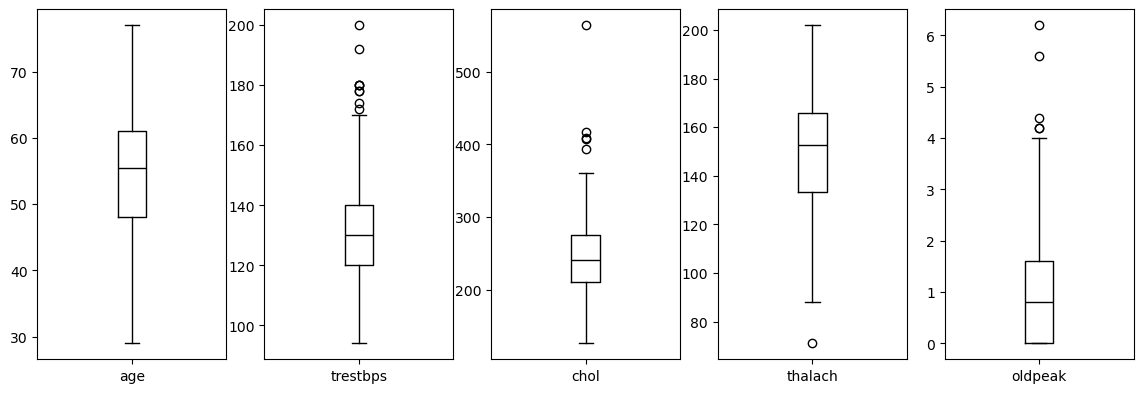

In [30]:
'''TODO: Menampilkan boxplot seluruh data'''
#Menampilkan boxplot untuk melihat outliers data numerik
data.plot(kind = 'box', subplots = True, layout = (2,7), sharex = False, sharey = False, figsize = (20, 10), color = 'k')
plt.show()

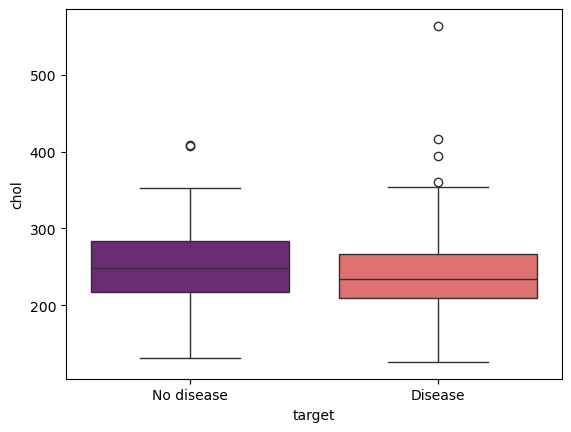

In [31]:
'''TODO: Menampilkan boxplot chol per target'''
# Menampilkan data berdasarkan target untuk feature chol
sns.boxplot(x='target', y='chol', data=data, palette='magma')
plt.show()

Data yang outliers terletak pada data non-categorical atau data continuous yaitu: 'age', 'trestbps', 'chol', 'thalach', dan 'oldpeak'

In [32]:
'''TODO: Menentukan data continous'''
#Mencari tahu data yang outliers dengan mendefinisikan fungsi
continous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']  
def outliers(data_out, drop = False):
    for each_feature in data_out.columns:
        feature_data = data_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) 
        Q3 = np.percentile(feature_data, 75.) 
        IQR = Q3-Q1 
        outlier_step = IQR * 1.5 
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, Num of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            data.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

'''TODO: Menampilkan data yang outlier'''
outliers(data[continous_features])

For the feature age, Num of Outliers is 0
For the feature trestbps, Num of Outliers is 9
For the feature chol, Num of Outliers is 5
For the feature thalach, Num of Outliers is 1
For the feature oldpeak, Num of Outliers is 5


In [33]:
'''TODO: Menghapus data yang outlier'''
# Menghapus outlier dengan fungsi sebelumnya
outliers(data[continous_features], drop=True)

Outliers from age feature removed
Outliers from trestbps feature removed
Outliers from chol feature removed
Outliers from thalach feature removed
Outliers from oldpeak feature removed


Melihat informasi dari kategori dari data kategorikal. 

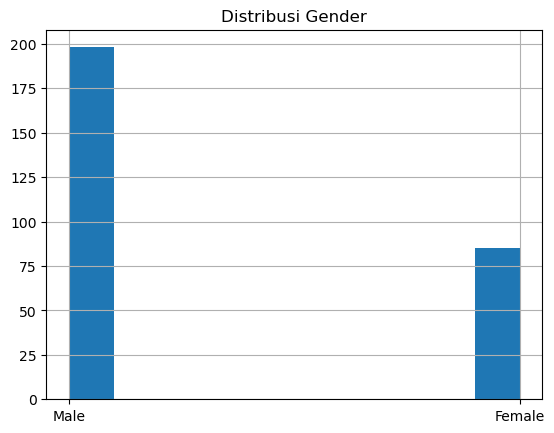

In [34]:
'''TODO: Buatlah histogram sex'''
# Jumlah kategori sex pada dataset
data.sex.hist().plot(kind='bar')
plt.title('Distribusi Gender')
plt.show()

In [35]:
data.sex.value_counts()

sex
Male      198
Female     85
Name: count, dtype: int64

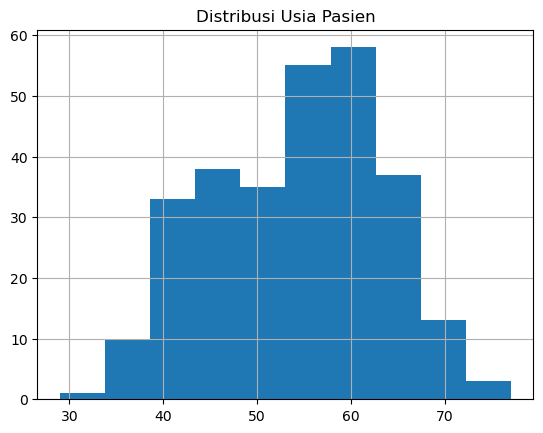

In [36]:
'''TODO: Buatlah histogram age'''
# Jumlah kategori age pada dataset
data.age.hist().plot(kind='bar')
plt.title('Distribusi Usia Pasien')
plt.show()

In [37]:
data.age.value_counts()

age
58    18
57    17
54    15
52    12
59    12
51    11
44    11
60    11
41    10
64     9
56     9
62     9
61     8
45     8
63     8
42     8
53     8
43     8
50     7
48     7
67     7
46     7
65     7
66     6
55     6
49     5
47     5
70     4
35     4
39     4
40     3
71     3
69     3
68     3
34     2
37     2
38     2
76     1
77     1
29     1
74     1
Name: count, dtype: int64

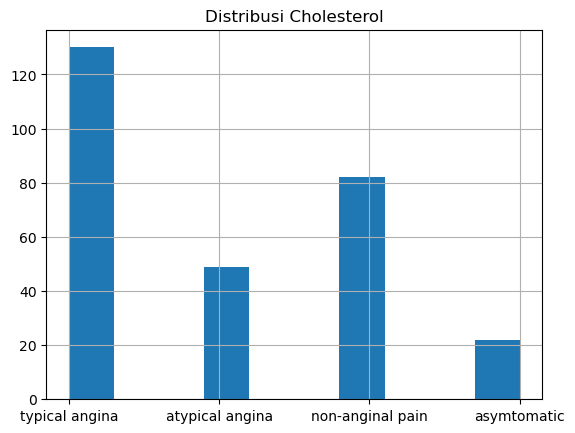

In [38]:
'''TODO: Buatlah histogram cp'''
# Jumlah kategori cp pada dataset
data.cp.hist().plot(kind='bar')
plt.title('Distribusi Cholesterol')
plt.show()

In [39]:
data.cp.value_counts()

cp
typical angina      130
non-anginal pain     82
atypical angina      49
asymtomatic          22
Name: count, dtype: int64

Selanjutnya kita akan melakukan pengecekan data, apakah target imbalance?

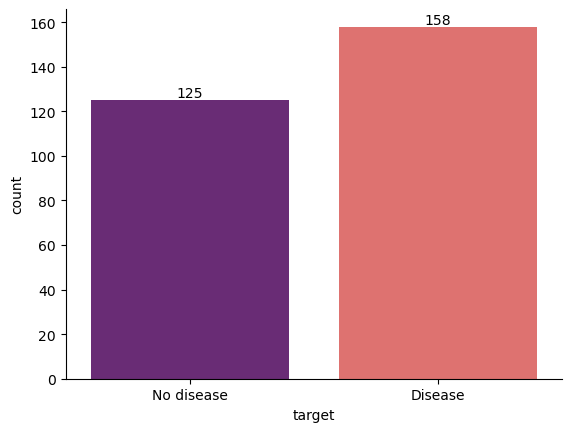

In [40]:
'''TODO: Memeriksa data yang imbalance'''
# Memeriksa data imbalance
ax = sns.countplot(data=data, x='target', palette='magma')
for label in ax.containers:
    ax.bar_label(label)
sns.despine()
plt.show()

In [41]:
#oversamplinh smote
target_counts = data ['target'].value_counts()
target_counts

target
Disease       158
No disease    125
Name: count, dtype: int64

In [42]:
#subtitusi nilai dengan oversampling smote
total_counts = target_counts.sum()
percentage = target_counts/total_counts * 100
percentage

target
Disease       55.830389
No disease    44.169611
Name: count, dtype: float64

Dapat dilihat pada output diatas data cukup seimbang (balanced), karena tidak terdapat perbedaan yang signifikan dimana terdiagnosa **disease** adalah 55.8% (158 cases), dan lain halnya untuk **no disease** adalah kurang dari 45%.

**Periksa statistik deskriptif dari kumpulan data (rata-rata, distribusi, dll)**

In [43]:
#Melihat statistik deskriptif dari data
data.describe()

,age,trestbps,chol,thalach,oldpeak
count,283.000000,283.000000,283.000000,283.000000,283.000000
mean,54.049470,129.883392,242.314488,149.961131,0.951943
std,9.128186,15.387795,44.654188,22.691625,1.026400
min,29.000000,94.000000,126.000000,88.000000,0.000000
25%,47.000000,120.000000,210.500000,133.500000,0.000000
50%,55.000000,130.000000,239.000000,153.000000,0.600000
75%,60.000000,140.000000,270.500000,168.000000,1.600000
max,77.000000,170.000000,360.000000,202.000000,4.000000


Dari kumpulan data yang diberikan, dapat dilihat bahwa terdapat 302 entri dan 6 kolom. Berikut adalah statistik deskriptif dari setiap variabel:

1. age: umur pasien, dengan rata-rata (mean) 54.42 tahun dan rentang antara 29 hingga 77 tahun. 
2. trestbps: tekanan darah saat istirahat (resting blood pressure) dalam mmHg, dengan rata-rata 131.6 dan rentang antara 94 hingga 200. 
3. chol: serum kolesterol dalam mg/dl, dengan rata-rata 246.5 dan rentang antara 126 hingga 564.
4. thalach: detak jantung maksimal yang dicapai selama tes olahraga, dengan rata-rata 149.57 dan rentang antara 71 hingga 202. 
5. oldpeak: depresi ST (ST depression) relatif terhadap istirahat yang diinduksi oleh olahraga, dengan rata-rata 1.043 dan rentang antara 0 hingga 6.2. 
6. target: variabel target yang menunjukkan keberadaan atau tidaknya penyakit jantung, dengan nilai 0 menunjukkan tidak adanya penyakit dan nilai 1 menunjukkan adanya penyakit.

Selanjutnya kita melihat distribusi data countinous.

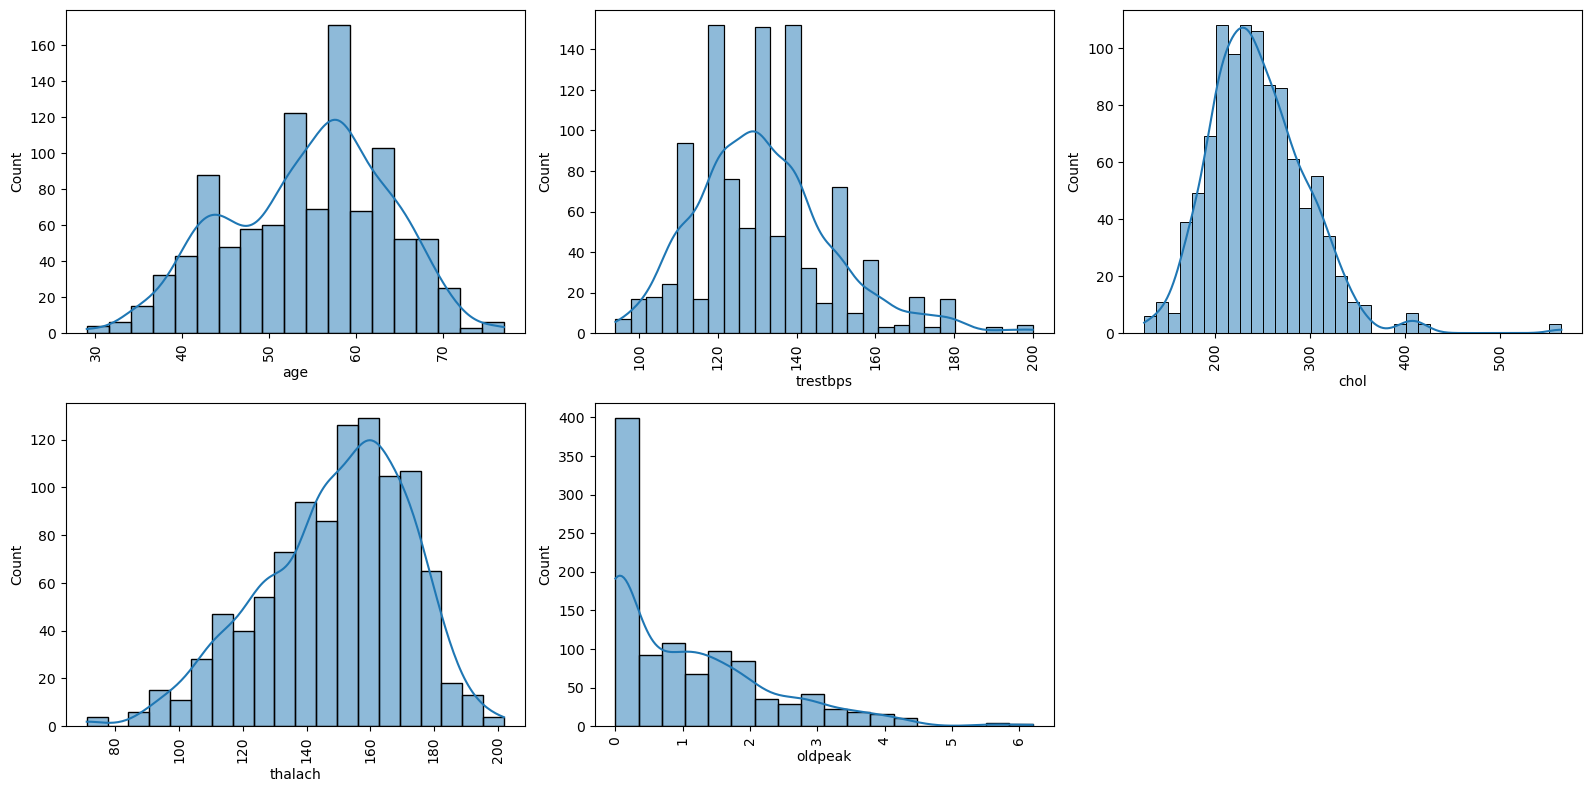

In [44]:
#Memvisualisasikan distribusi variabel numerical
plt.figure(figsize=(16,8))
for index,column in enumerate(numerical_col):
    plt.subplot(2,3,index+1)
    sns.histplot(data=numerical_col,x=column,kde=True)
    plt.xticks(rotation = 90)
plt.tight_layout(pad = 1.0)
plt.show()

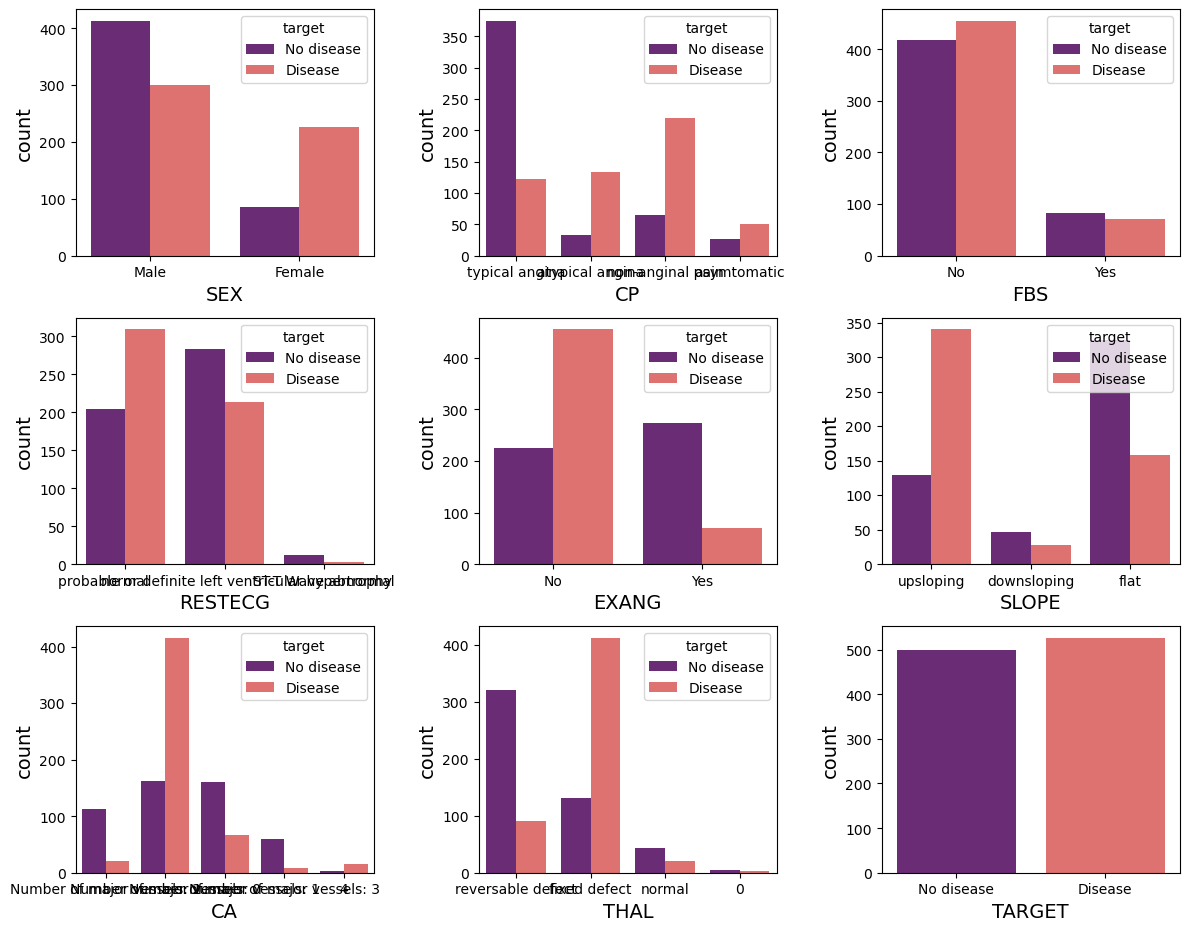

In [47]:
#Memvisualisasikan distribusi variabel kategorikal
plt.figure(figsize=(12,12))
for index,column in enumerate(categorical_col):
    plt.subplot(4, 3, index+1)
    sns.countplot(data=categorical_col,x=column, hue='target', palette='magma')
    plt.xlabel(column.upper(),fontsize=14)
    plt.ylabel("count", fontsize=14)

plt.tight_layout(pad = 1.0)
plt.show()


Melihat korelasi antar feature

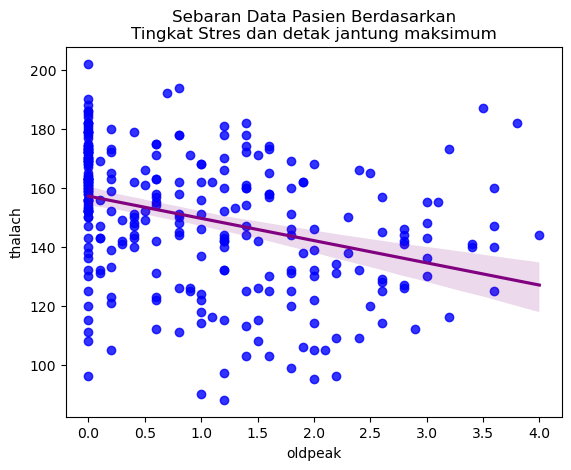

In [48]:
'''TODO: Menampilkan oldpeak dengan thalach'''
# melihat korelasi tingkat depresi dan detak jantung maksimum
plt.Figure(figsize = (8,6))
sns.regplot(x=data['oldpeak'], y=data['thalach'],scatter_kws={'color':'blue'},line_kws={'color': 'purple'})
plt.title('Sebaran Data Pasien Berdasarkan\nTingkat Stres dan detak jantung maksimum')
plt.show()

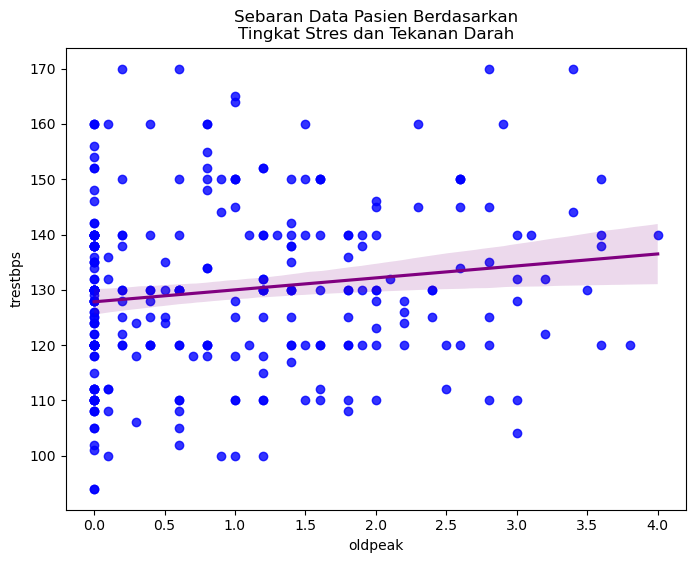

In [49]:
#melihat korelasi tingkat depresi dan tekanan darah
plt.figure(figsize = (8,6))
sns.regplot(x=data['oldpeak'], y=data['trestbps'], scatter_kws = {'color':'blue'}, line_kws = {'color':'purple'})
plt.title('Sebaran Data Pasien Berdasarkan\nTingkat Stres dan Tekanan Darah')
plt.show()

Simpulkan dari grafik yang kamu dapatkan?

In [50]:
# Simpan data yang sudah ada label
data.to_csv('data.csv')

# Melabeli kembali datanya
df = pd.read_csv('data.csv', index_col=0)
df['sex'] = df['sex'].replace({'Male' : 1,'Female': 0})
df['cp'] = df['cp'].replace({'typical angina' : 0, 'atypical angina' : 1, 'non-anginal pain' : 2, 'asymtomatic' : 3})
df['fbs'] = df['fbs'].replace({'No' : 0, 'Yes' : 1})
df['restecg'] = df['restecg'].replace({'probable or definite left ventricular hypertrophy':0,'normal':1,'ST-T Wave abnormal':2})
df['exang'] = df['exang'].replace({'No':0,'Yes':1})
df['slope'] = df['slope'].replace({'downsloping':0, 'flat':1,'upsloping':2})
df['thal'] = df['thal'].replace({'normal':1, 'fixed defect':2,'reversable defect':3})
df['ca'] = df['ca'].replace({'Number of major vessels: 0':0, 'Number of major vessels: 1':1,'Number of major vessels: 2':2, 'Number of major vessels: 3':3})
df['target'] = df['target'].replace({'No disease':0,'Disease':1})

In [51]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


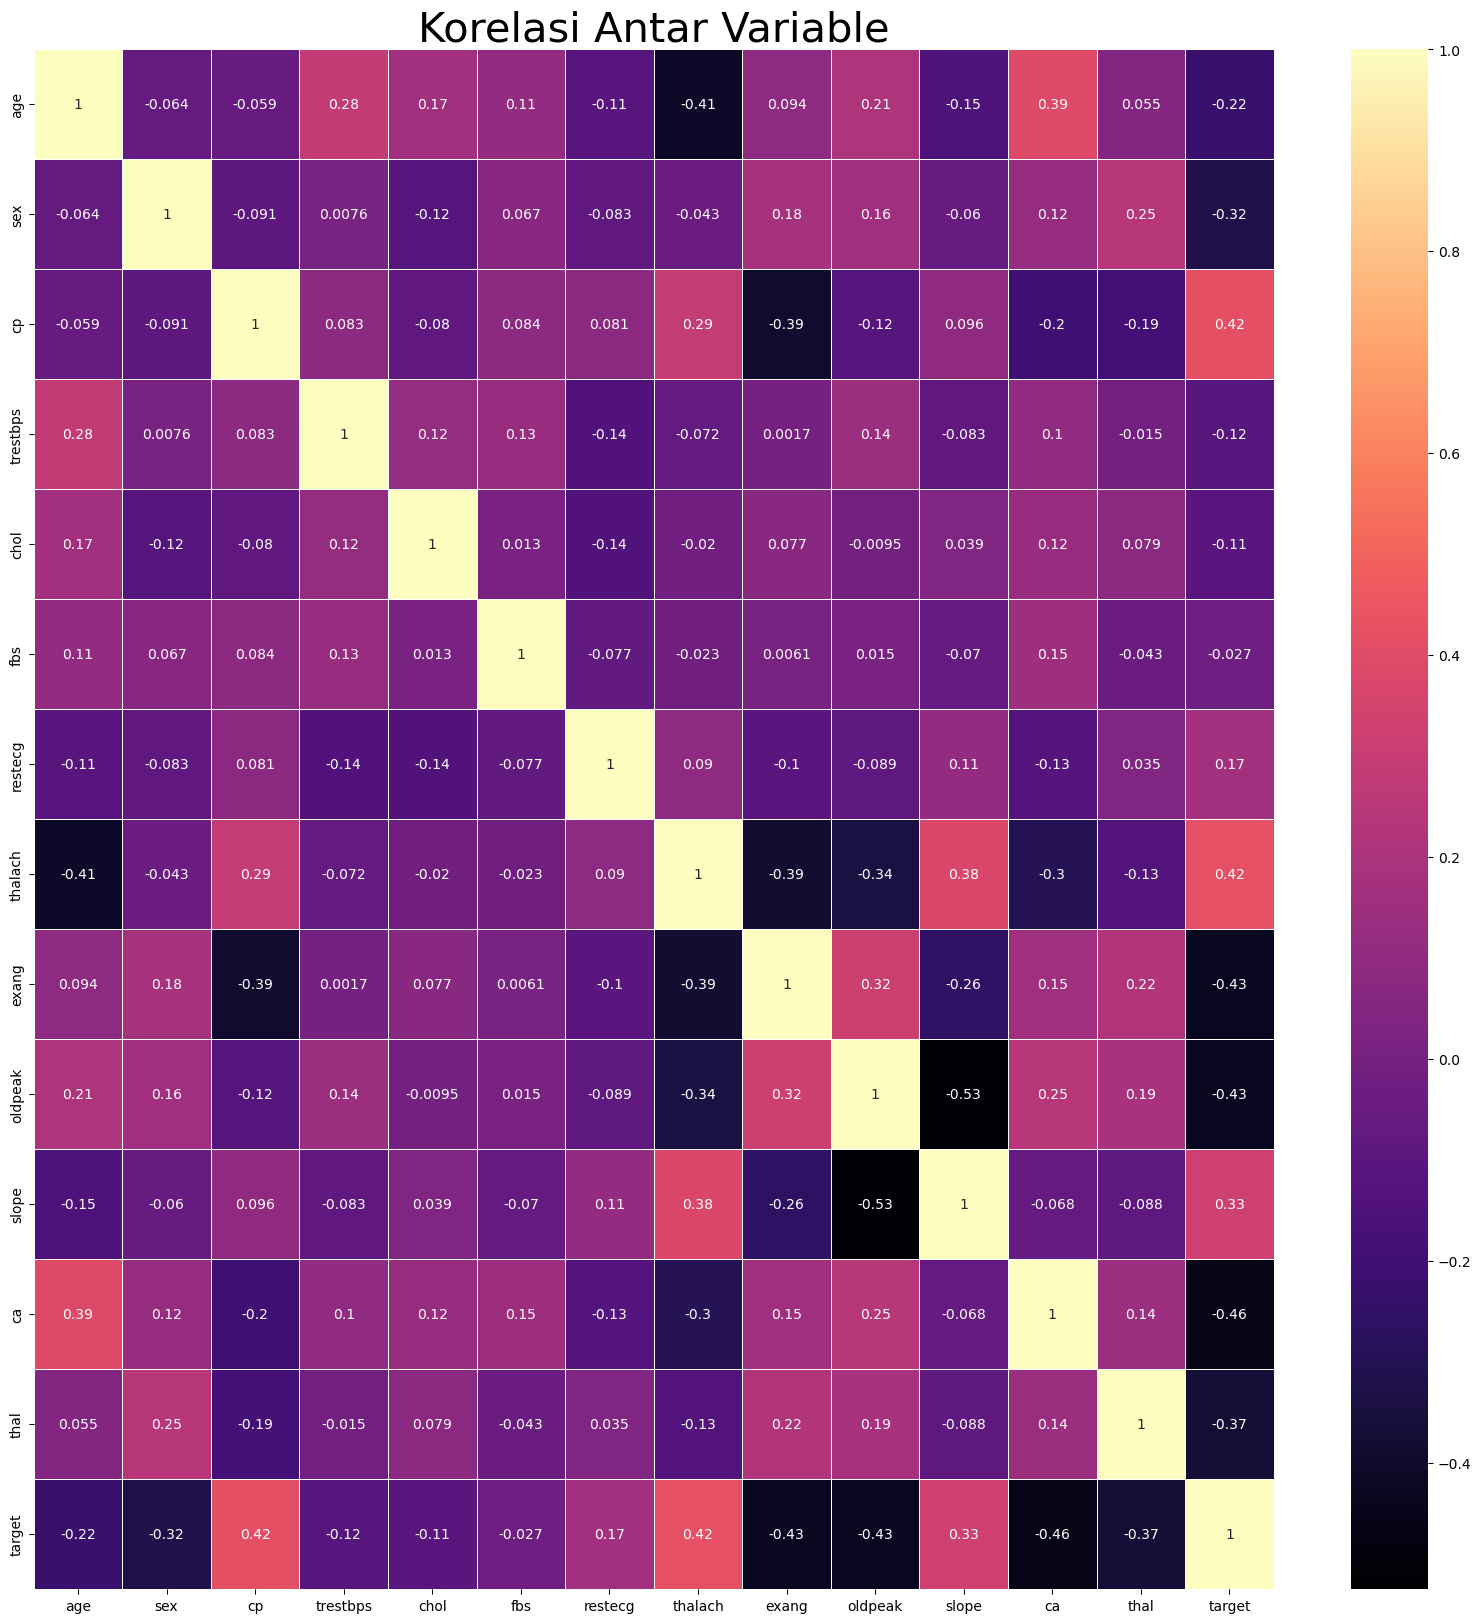

In [53]:
'''TODO: Menampilkan grafik korelasi'''
# melihat korelasi antar variable untuk mencari feature yang penting
plt.figure(figsize=(20,20))
cor = df.corr()
sns.heatmap(cor,annot=True, linewidth=.5, cmap="magma")
plt.title('Korelasi Antar Variable', fontsize = 30)
plt.show()

In [54]:
'''TODO: Menampilkan tabel korelasi'''
cor_matrix = df.corr()
cor_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.064118,-0.058687,0.282669,0.171015,0.106885,-0.110517,-0.411108,0.093718,0.209254,-0.149095,0.392130,0.054752,-0.222416
sex,-0.064118,1.000000,-0.091357,0.007572,-0.123863,0.066692,-0.083290,-0.042981,0.182596,0.157352,-0.060014,0.122489,0.245682,-0.318896
cp,-0.058687,-0.091357,1.000000,0.083242,-0.080369,0.084389,0.080836,0.285605,-0.388610,-0.122582,0.095881,-0.202923,-0.188487,0.416319
trestbps,0.282669,0.007572,0.083242,1.000000,0.115138,0.127221,-0.139228,-0.071600,0.001726,0.144438,-0.083024,0.101059,-0.014615,-0.115614
chol,0.171015,-0.123863,-0.080369,0.115138,1.000000,0.013066,-0.142285,-0.020128,0.076547,-0.009534,0.039352,0.124800,0.078868,-0.105627
fbs,0.106885,0.066692,0.084389,0.127221,0.013066,1.000000,-0.077417,-0.023484,0.006080,0.015070,-0.069563,0.150552,-0.042766,-0.027210
restecg,-0.110517,-0.083290,0.080836,-0.139228,-0.142285,-0.077417,1.000000,0.089556,-0.104440,-0.089255,0.111841,-0.126825,0.035452,0.171453
thalach,-0.411108,-0.042981,0.285605,-0.071600,-0.020128,-0.023484,0.089556,1.000000,-0.387726,-0.341190,0.376494,-0.296480,-0.134498,0.422559
exang,0.093718,0.182596,-0.388610,0.001726,0.076547,0.006080,-0.104440,-0.387726,1.000000,0.318620,-0.259780,0.154768,0.223241,-0.431599
oldpeak,0.209254,0.157352,-0.122582,0.144438,-0.009534,0.015070,-0.089255,-0.341190,0.318620,1.000000,-0.525142,0.245318,0.189228,-0.434108


In [55]:
#Mengurutkan korelasi
cor_matrix['target'].sort_values()

ca         -0.456989
oldpeak    -0.434108
exang      -0.431599
thal       -0.370759
sex        -0.318896
age        -0.222416
trestbps   -0.115614
chol       -0.105627
fbs        -0.027210
restecg     0.171453
slope       0.326473
cp          0.416319
thalach     0.422559
target      1.000000
Name: target, dtype: float64

Korelasi target(penyakit jantung) dengan variabel lainnya. Korelasi positif dengan variabel tertentu berarti semakin tinggi variabel tersebut maka akan semakin tinggi juga kemungkinan terkena penyakit jantung, sedangkan korelasi negatif ialah semakin rendah nilai variabel tersebut maka kemungkinan terkena penyakit jantung lebih tinggi.

1. ca -0.456989 (Korelasi Negatif Kuat)
2. oldpeak -0.434108 (Korelasi Negatif Kuat)
3. exang -0.431599 (Korelasi Negatif Kuat)
4. thal -0.370759 (Korelasi Negatif Kuat)
5. sex -0.318896 (Korelasi Negatif Kuat)
6. age -0.222416 (Korelasi Negatif)
7. trestbps -0.115614 (Korelasi Negatif Lemah)
8. chol -0.0105627 (Korelasi Negatif Lemah)
9. fbs 0.027210 (Korelasi Positif Lemah)
10. restecg 0.171453 (Korelasi Positif Lemah)
11. slope 0.326473 (korelasi Positif Kuat)
12. cp 0.422559 (korelasi Positif Kuat)
13. thalach 0.432211 (korelasi Positif Kuat)

Jadi, bisa disimpulkan faktor yang paling berpengaruh terhadap penyakit jantung ialah, sebagai berikut:

1. ca (semakin banyak major vessels ,maka akan semakin tinggi resiko terkena penyakit jantung)
2. oldpeak (Semakin rendah depresi ST yang disebabkan oleh latihan relatif terhadap istirahat, maka resiko terkena penyakit jantung akan semakin tinggi)
3. exang (Apibila exercise induced angina rendah, maka resiko terkena penyakit jantung akan semakin tinggi)
4. thal(semakin rendah tipe jenis defek jantung, maka resiko terkena penyakit jantung semakin tinggi)
5. sex (Perempuan memiliki resiko terkena penyakit jantung lebih tinggi dibandingkan laki-laki)
6. age (semakin muda umur, ternyata semakin tinggi terkena penyakit jantung)
7. slope (Semakin tinggi kemiringan segmen latihan ST maka, resiko terkena penyakit jantung semakin tinggi)
8. cp (Semakin tinggi tipe Jenis rasa sakit pada dada, maka resiko terkena penyakit jantung semakin tinggi)
9. thalach (semakin tinggi detak jantung maksimum yang dicapai pasien selama tes latihan, maka resiko terkena penyakit jantung semakin tinggi)

Kesimpulan.

1. 'cp', 'thalach', dan 'slope' berkorelasi positif cukup kuat dengan 'target'.
2. 'oldpeak', 'exang', 'ca', 'thal', 'sex', dan 'age' berkorelasi cukup kuat dengan 'target'.
3. 'fbs', 'chol', 'trestbps', dan 'restecg' memiliki korelasi yang lemah dengan 'target'.

Feature yang dipilih yaitu :'cp', 'thalach', 'slope', 'oldpeak', 'exang', 'ca', 'thal', 'sex', dan 'age' untuk dianalisa lebih lanjut.

In [56]:
'''TODO: Memasukkan 9 variabel terpilih diatas'''
variabel = ['cp', 'thalach', 'slope', 'oldpeak', 'exang', 'ca', 'thal', 'sex','age' ]
analyze = df[variabel]

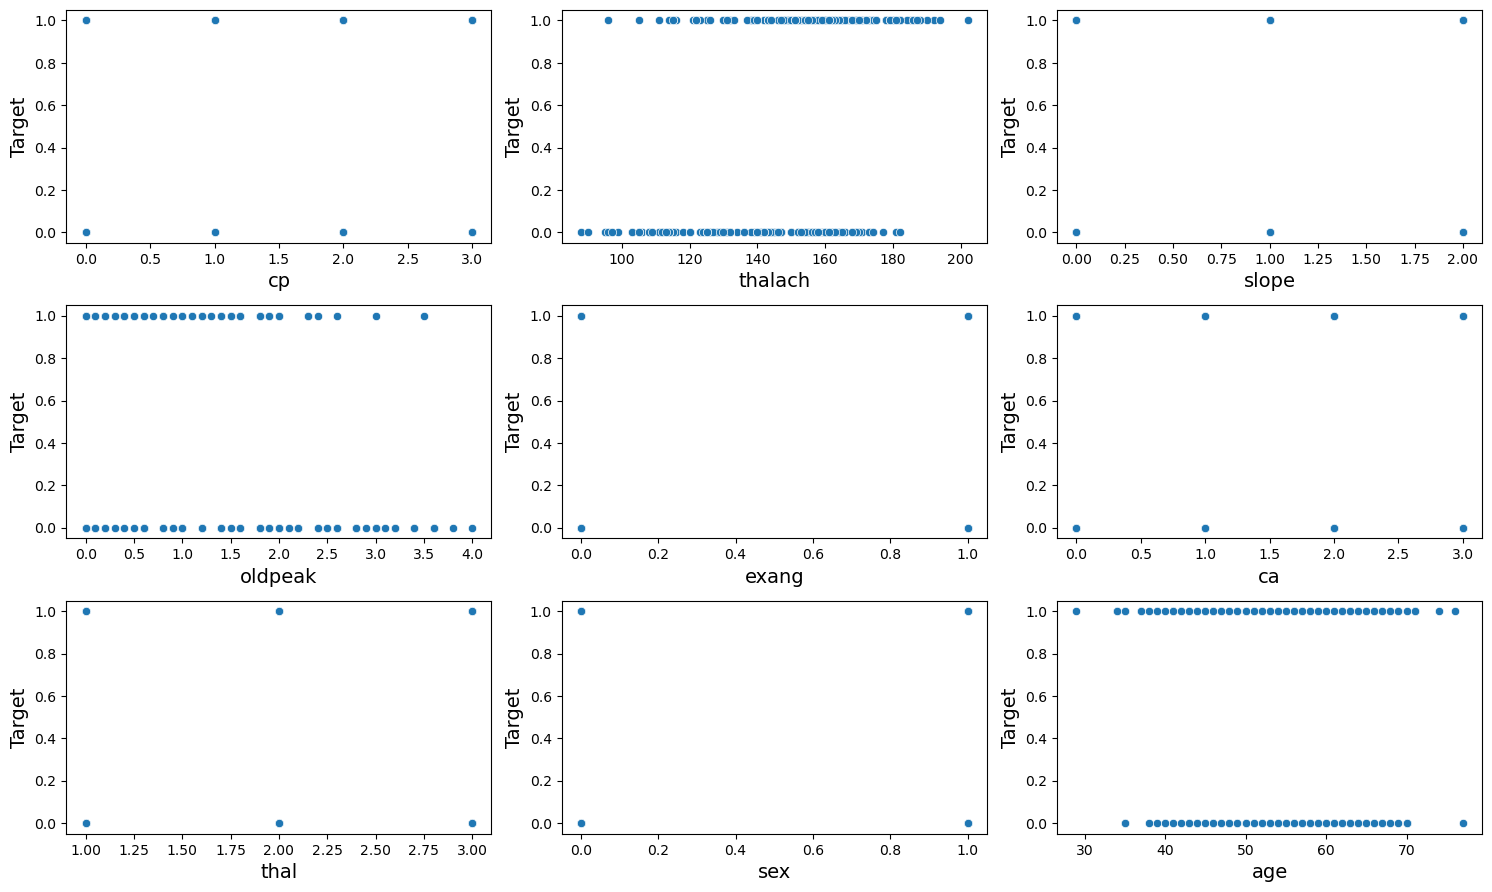

In [57]:
# Informasi variabel ke target
fig = plt.figure(figsize=(15,9))
for index in range(len(analyze.columns)):
    plt.subplot(3,3,index + 1)
    sns.scatterplot(x = analyze.iloc[:,index],y=df.target,data = analyze)
    plt.xlabel(analyze.columns[index], fontsize=14)
    plt.ylabel("Target", fontsize=14)

fig.tight_layout(pad = 1.0)

**Scaling data**

Scaling adalah suatu cara untuk membuat numerical data pada dataset memiliki rentang nilai (scale) yang sama. Tidak ada lagi satu variabel data yang mendominasi variabel data lainnya.

In [58]:
# Mendefinisikan standard scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop("target", axis=1))

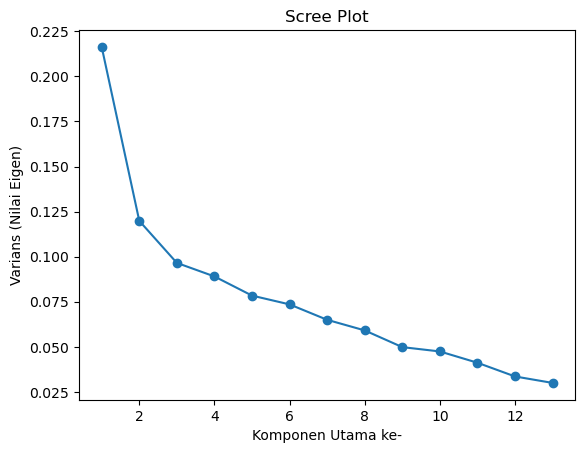

In [59]:
# Perform PCA for dimensionality reduction
feature_number = len(X_scaled[0])
pca = PCA(n_components=feature_number)

# Fit PCA with dataset
pca.fit(X_scaled)

# Get variance information
variance_ratio = pca.explained_variance_ratio_

# Calculate cummulative
cumulative_variance = np.cumsum(variance_ratio)

# Create Scree Plot
plt.plot(range(1, len(variance_ratio) + 1), variance_ratio, marker='o')
plt.xlabel('Komponen Utama ke-')
plt.ylabel('Varians (Nilai Eigen)')
plt.title('Scree Plot')
plt.show()

In [60]:
pca = PCA(n_components=9)
heart_data_reduced = pca.fit_transform(X_scaled)

In [61]:
feature_names = df.drop('target', axis=1).columns.to_list()
component_names = [f"PC{i+1}" for i in range(pca.n_components_)]

for component, component_name in zip(pca.components_, component_names):
    feature_indices = component.argsort()[::-1]
    retained_features = [feature_names[idx] for idx in feature_indices[:pca.n_components_]]
    print(f"{component_name}: {retained_features}")

PC1: ['thalach', 'slope', 'cp', 'restecg', 'fbs', 'chol', 'trestbps', 'sex', 'thal']
PC2: ['trestbps', 'age', 'cp', 'fbs', 'chol', 'ca', 'slope', 'thalach', 'oldpeak']
PC3: ['chol', 'slope', 'ca', 'thal', 'exang', 'age', 'thalach', 'restecg', 'sex']
PC4: ['sex', 'fbs', 'thal', 'thalach', 'slope', 'ca', 'trestbps', 'cp', 'exang']
PC5: ['restecg', 'ca', 'age', 'thal', 'slope', 'fbs', 'cp', 'sex', 'oldpeak']
PC6: ['thal', 'trestbps', 'chol', 'cp', 'oldpeak', 'restecg', 'thalach', 'sex', 'age']
PC7: ['fbs', 'chol', 'restecg', 'exang', 'thal', 'thalach', 'oldpeak', 'cp', 'trestbps']
PC8: ['trestbps', 'exang', 'restecg', 'slope', 'fbs', 'sex', 'age', 'thalach', 'thal']
PC9: ['thal', 'age', 'cp', 'fbs', 'slope', 'exang', 'trestbps', 'sex', 'chol']
